In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Bouncer,2015
1,Indi,2007
2,Just Another Noir,2011
3,Viva la juventud!,1956
4,Yerra Mandaram,1991


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [110]:
h = cast[cast.character.isin(['Batman', 'Superman'])].groupby(by = ['year','character']).size()
h = h.unstack().fillna(0)
h[h.Superman > h.Batman].shape[0]

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [37]:
h = cast[cast.character.isin(['Batman', 'Superman'])]\
    .groupby(by = ['year','character'])\
    .size()\
    .unstack()\
    .fillna(0)
h[h.Batman > h.Superman].shape[0]

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

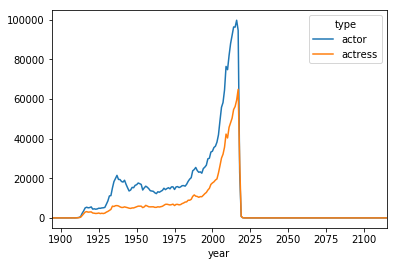

In [47]:
cast.groupby(by=['year', 'type']).size().unstack().fillna(0).sort_index().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

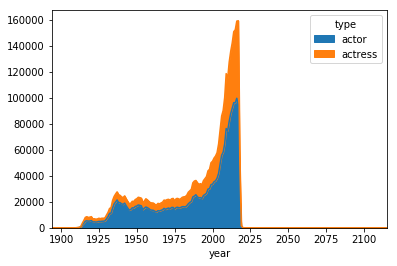

In [58]:
cast.groupby([cast.year, cast.type]).size().unstack().fillna(0).sort_index().plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

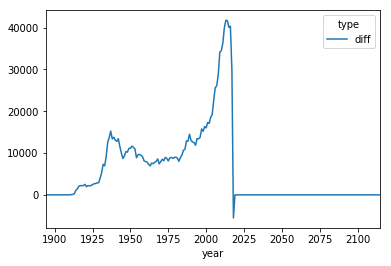

In [67]:
h = cast.groupby([cast.year, cast.type]).size().unstack().fillna(0).sort_index()
h['diff'] = h.actor - h.actress
h.plot(y = ['diff'])

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

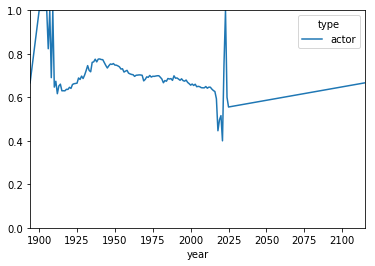

In [111]:
h = cast.groupby([cast.year, cast.type]).size().unstack().fillna(0)
h['total'] = h.actor + h.actress
h.actor = h.actor / h.total
h.actress = h.actress / h.total

h.plot(y = ['actor'], ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

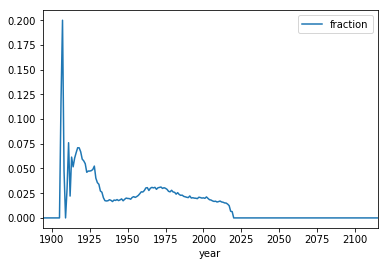

In [108]:
a = cast[(cast.n == 2) & (cast.type == 'actor')].groupby([cast.year]).size().sort_index()
b = cast.groupby([cast.year]).size().sort_index()
c = pd.concat([a.rename('n2'), b.rename('all')], axis=1).fillna(0)
c['fraction'] = c['n2'] / c['all']
c.plot(y = 'fraction')

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

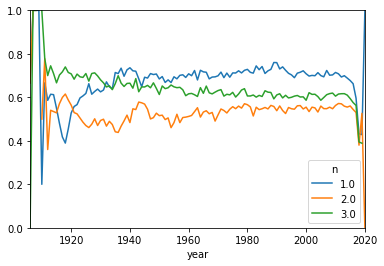

In [162]:
a = cast[(cast.n >=1) & (cast.n <=3)].groupby(by = ['year','n','type']).size().unstack().fillna(0).sort_index()
a['frac'] = a['actor'] / (a['actor'] + a['actress'])
a = a['frac']
a = a.unstack()
a.plot(ylim=[0,1])